In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import scipy.stats as pearsonr
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
df.shape

(1013, 7)

In [4]:
df.dtypes

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

In [5]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [8]:
df = df.round(2)

In [9]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.83,16,512,11.19,2.64,17395.09
1,Acer,2.91,4,1000,11.31,3.26,31607.61
2,Lenovo,3.24,4,256,11.85,2.03,9291.02
3,Acer,3.81,16,512,12.28,4.57,17436.73
4,Acer,3.27,32,1000,14.99,4.19,32917.99


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1013 non-null   object 
 1   Processor_Speed   1013 non-null   float64
 2   RAM_Size          1013 non-null   int64  
 3   Storage_Capacity  1013 non-null   int64  
 4   Screen_Size       1013 non-null   float64
 5   Weight            1013 non-null   float64
 6   Price             1013 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 55.5+ KB


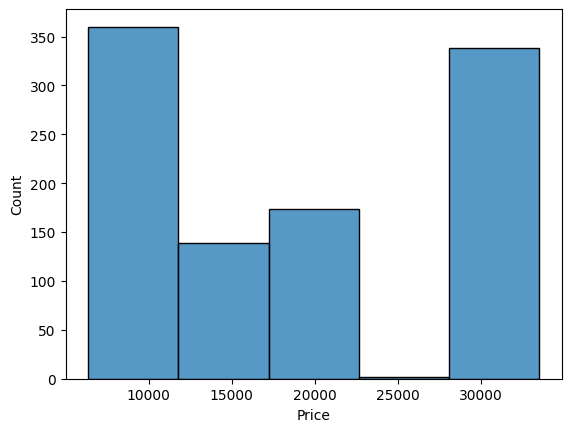

In [11]:
sns.histplot(df['Price'], bins=5)
plt.show()

In [12]:
print(df['Price'].skew())

0.36507673939751895


In [13]:
print(df['Brand'].unique())

['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']


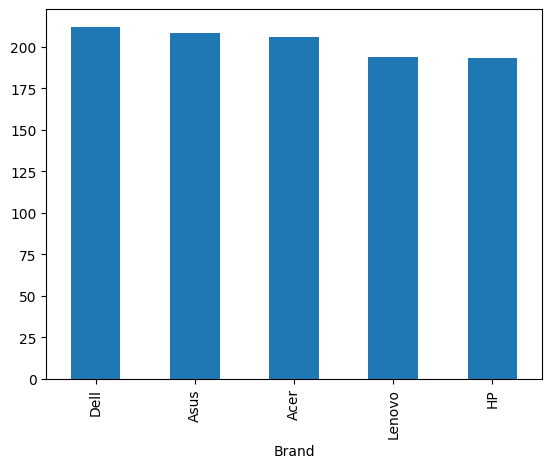

In [14]:
df['Brand'].value_counts().plot(kind='bar')
plt.show()

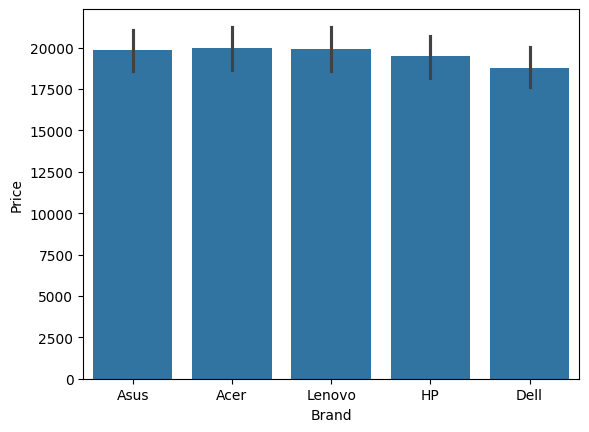

In [15]:
sns.barplot(x=df['Brand'], y=df['Price'])
plt.show()

In [16]:
print(df['RAM_Size'].unique())

[16  4 32  8]


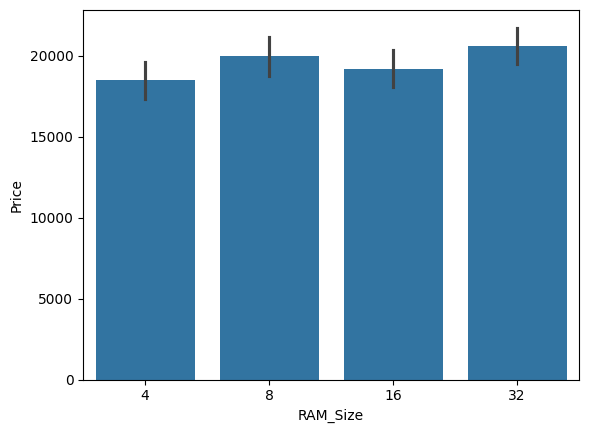

In [17]:
sns.barplot(x=df['RAM_Size'],y=df['Price'])
plt.show()

In [18]:
print(df['Storage_Capacity'].unique())

[ 512 1000  256 1024  128]


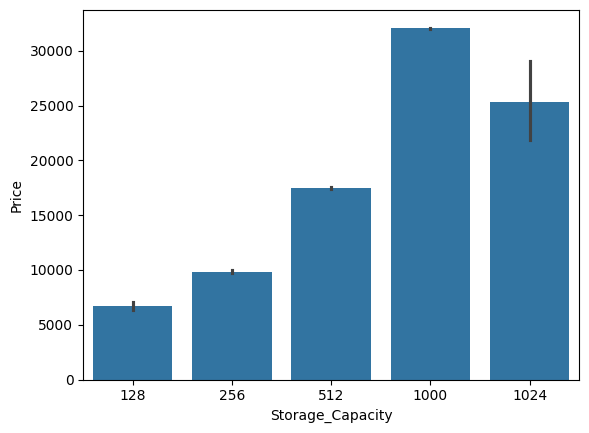

In [19]:
sns.barplot(x=df['Storage_Capacity'],y=df['Price'])
plt.show()

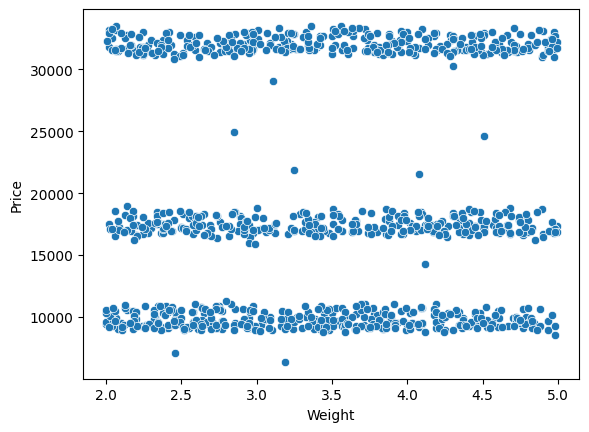

In [20]:
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

In [21]:
num_df = df.select_dtypes(include='number')
correlation = num_df.corr()
print(correlation['Price'])


Processor_Speed    -0.051514
RAM_Size            0.066324
Storage_Capacity    0.993809
Screen_Size        -0.024210
Weight              0.040871
Price               1.000000
Name: Price, dtype: float64


<Axes: >

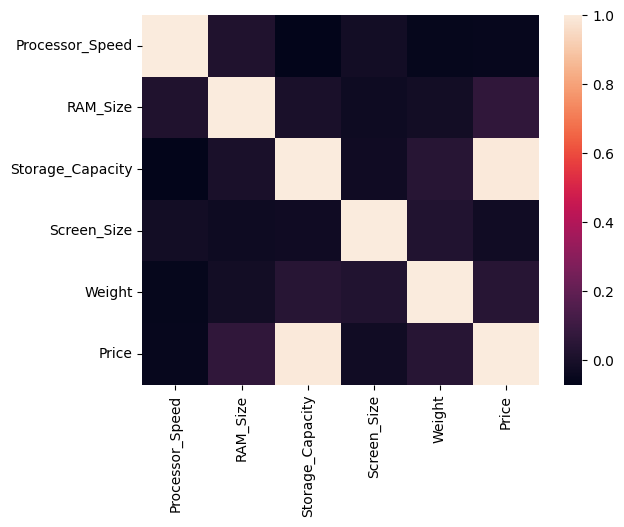

In [22]:
sns.heatmap(num_df.corr())

<Axes: xlabel='Price', ylabel='Count'>

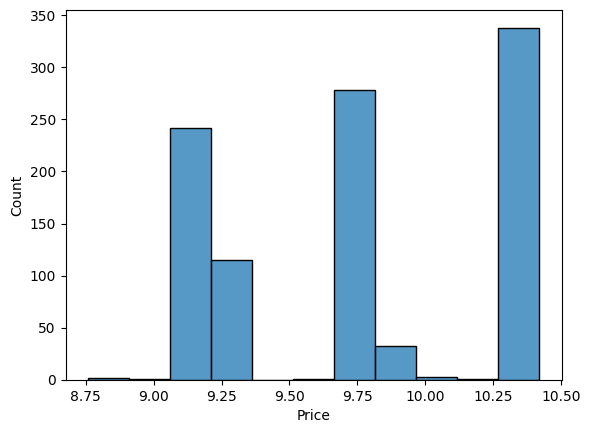

In [23]:
sns.histplot(np.log(df['Price']))

In [24]:
df['Price'] = np.log(num_df['Price'])

In [25]:
num_df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T


,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Processor_Speed,1013.0,2.755637,0.729467,1.51,1.5300,1.5600,1.580,1.610,2.77,3.880,3.9100,3.9300,3.9600,3.9800,4.00
RAM_Size,1013.0,15.490622,10.979372,4.00,4.0000,4.0000,4.000,4.000,16.00,32.000,32.0000,32.0000,32.0000,32.0000,32.00
Storage_Capacity,1013.0,583.644620,313.546285,128.00,256.0000,256.0000,256.000,256.000,512.00,1000.000,1000.0000,1000.0000,1000.0000,1000.0000,1024.00
Screen_Size,1013.0,14.042053,1.704039,11.01,11.0700,11.0924,11.170,11.300,14.08,16.640,16.6700,16.7628,16.8676,16.9200,16.99
Weight,1013.0,3.466782,0.863773,2.00,2.0300,2.0500,2.070,2.140,3.46,4.814,4.8600,4.9000,4.9400,4.9700,4.99
Price,1013.0,19590.137038,9384.263264,6367.65,8932.4764,8972.0092,9031.234,9110.002,17291.11,32817.744,32882.9356,32951.6412,33042.8336,33226.3316,33503.94


In [26]:
df_filetered = df[df['Price']<=33000]
df_filetered.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Processor_Speed,1013.0,2.755637,0.729467,1.510000,1.530000,1.560000,1.580000,1.610000,2.770000,3.880000,3.910000,3.930000,3.96000,3.980000,4.000000
RAM_Size,1013.0,15.490622,10.979372,4.000000,4.000000,4.000000,4.000000,4.000000,16.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000
Storage_Capacity,1013.0,583.644620,313.546285,128.000000,256.000000,256.000000,256.000000,256.000000,512.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1024.000000
Screen_Size,1013.0,14.042053,1.704039,11.010000,11.070000,11.092400,11.170000,11.300000,14.080000,16.640000,16.670000,16.762800,16.86760,16.920000,16.990000
Weight,1013.0,3.466782,0.863773,2.000000,2.030000,2.050000,2.070000,2.140000,3.460000,4.814000,4.860000,4.900000,4.94000,4.970000,4.990000
Price,1013.0,9.762292,0.497049,8.758986,9.097449,9.101865,9.108444,9.117128,9.757948,10.398725,10.400709,10.402796,10.40556,10.411098,10.419418


In [27]:
df = df[df['Price']<=33000]
price = df['Price']
storage = df['Storage_Capacity']
corr,p_value = stats.pearsonr(price,storage)
print("corr = ",round(corr,3))
print("P_value = ",round(p_value,3))
if(p_value < 0.05):
    print("Reject the null hypothesis")

corr =  0.98
P_value =  0.0
Reject the null hypothesis


In [28]:
print(df['Price'].max())

10.419418322837714


In [29]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_name' is the string column
encoder = LabelEncoder()
df['Brand'] = encoder.fit_transform(df['Brand'])
df.head()

testing = pd.read_csv('test.csv')
testing['Brand'] = encoder.fit_transform(testing['Brand'])
testing = testing[testing['Price']<=33000]
testing['Price'] = np.log(testing['Price'])

In [30]:
x = df.drop('Price',axis=1)
y = df['Price']
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
df.head()
new_x = testing.drop('Price',axis=1)
new_y = testing['Price']
newX_train, newX_test, newY_train, newY_test = train_test_split(new_x,new_y,test_size=0.2, random_state=42)

In [31]:
model = DecisionTreeRegressor( max_depth=8,min_samples_split=8,min_samples_leaf=8, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.002491017852644417


In [32]:

y_test_unlogged = np.exp(y_test)
predictions_unlogged = np.exp(y_pred)
comparison_df = pd.DataFrame({'Actual': y_test_unlogged, 'Predicted': predictions_unlogged})

# Print the first few rows of the comparison
print(comparison_df.head())

       Actual     Predicted
689  16640.73  16841.091665
518  31809.78  31620.877289
940  10404.66  10546.918221
96    9491.27   9636.355536
578  10413.73  10522.064034


In [33]:
print(newY_test)

11    10.123110
9     10.109742
0      9.676287
Name: Price, dtype: float64


In [34]:
y_predd = model.predict(newX_test)
msee = mean_squared_error(newY_test, y_predd)
print(f'Mean Squared Error: {msee}')

Mean Squared Error: 0.028491652291908903


In [35]:
y_test_unloggedd = np.exp(newY_test)
predictions_unloggedd = np.exp(y_predd)
comparison_ddf = pd.DataFrame({'Actual': y_test_unloggedd, 'Predicted': predictions_unloggedd})

# Print the first few rows of the comparison
print(comparison_ddf.head())

          Actual     Predicted
11  24912.137050  29257.246905
9   24581.328189  19351.414737
0   15935.214876  16735.364659
